
To demonstrate a basic trading strategy, let’s assume the following:

* We buy the stock when the Kalman filter estimate is significantly below the observed price, expecting a price correction upwards.
* We sell the stock when the Kalman filter estimate is significantly above the observed price, expecting a price correction downwards.

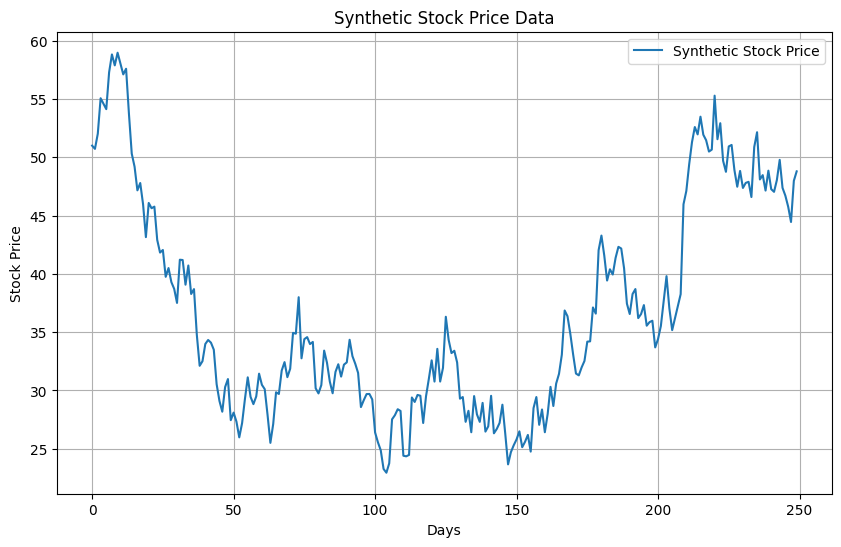

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Number of days for our synthetic stock data
num_days = 250

# Generate synthetic stock price data using random walk
epsilon = np.random.normal(0, 2, num_days)  # Noise term
prices = np.cumsum(epsilon) + 50  # Start from a stock price of 50

# Plot the synthetic stock price data
plt.figure(figsize=(10, 6))
plt.plot(prices, label="Synthetic Stock Price")
plt.title("Synthetic Stock Price Data")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()

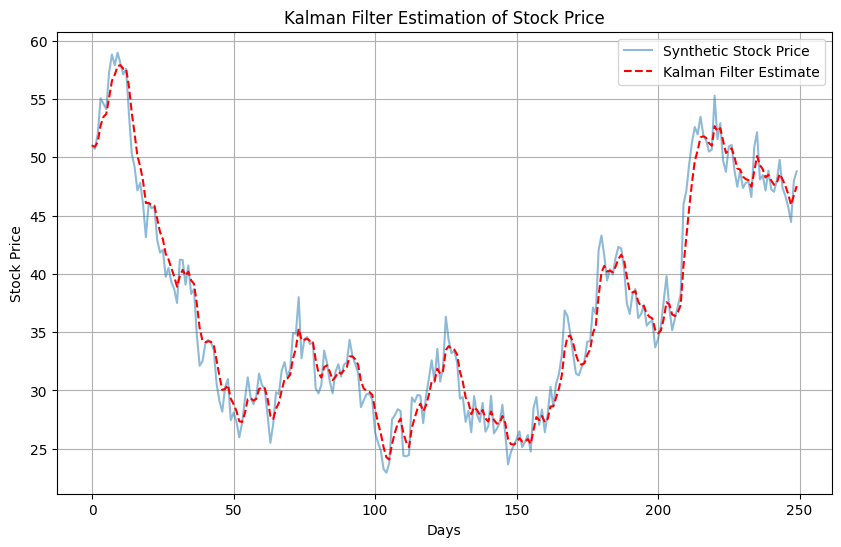

In [2]:
class KalmanFilter:
    def __init__(self, Q, R):
        # Initial state estimate
        self.P_hat = np.zeros(num_days)
        # Initial state estimate error variance
        self.P_var = np.zeros(num_days)
        # Process noise variance
        self.Q = Q
        # Measurement noise variance
        self.R = R
        # Initial estimate of state
        self.P_hat[0] = prices[0]
        # Initial estimate of state variance
        self.P_var[0] = 1.0

    def update(self, z):
        for t in range(1, num_days):
            # Prediction Step
            P_hat_minus = self.P_hat[t-1]  # Predicted state estimate
            P_var_minus = self.P_var[t-1] + self.Q  # Predicted error variance
            
            # Update Step
            Kt = P_var_minus / (P_var_minus + self.R)  # Kalman gain
            self.P_hat[t] = P_hat_minus + Kt * (z[t] - P_hat_minus)  # Updated state estimate
            self.P_var[t] = (1 - Kt) * P_var_minus  # Updated estimate of state variance

# Parameters for our Kalman filter
Q = 1  # Process noise variance (assumption)
R = 4  # Measurement noise variance (based on our synthetic data generation)

# Create and run the Kalman filter
kf = KalmanFilter(Q, R)
kf.update(prices)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(prices, label="Synthetic Stock Price", alpha=0.5)
plt.plot(kf.P_hat, label="Kalman Filter Estimate", linestyle="--", color="red")
plt.title("Kalman Filter Estimation of Stock Price")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()

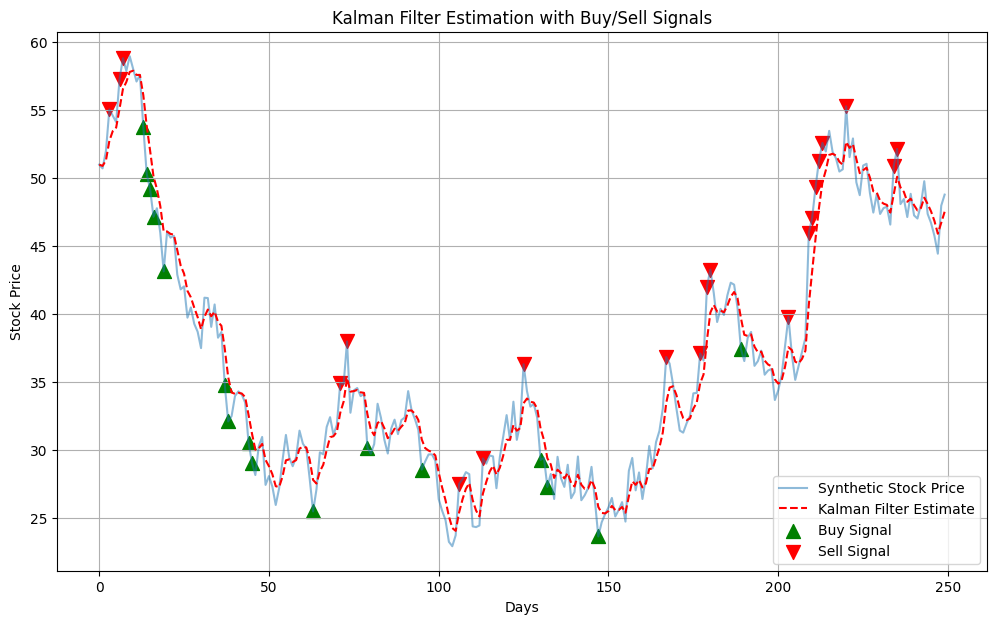

In [3]:
# Threshold for buy/sell signals
threshold = 2

# Generate buy/sell signals
buy_signals = np.where(prices < kf.P_hat - threshold)[0]
sell_signals = np.where(prices > kf.P_hat + threshold)[0]

# Plot the results with buy/sell signals
plt.figure(figsize=(12, 7))
plt.plot(prices, label="Synthetic Stock Price", alpha=0.5)
plt.plot(kf.P_hat, label="Kalman Filter Estimate", linestyle="--", color="red")
plt.scatter(buy_signals, prices[buy_signals], marker="^", color="green", s=100, label="Buy Signal")
plt.scatter(sell_signals, prices[sell_signals], marker="v", color="red", s=100, label="Sell Signal")
plt.title("Kalman Filter Estimation with Buy/Sell Signals")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()

## Homework

* Try the historical data
* How to determin process noise variance and measurement noise variance

## Resources

* https://medium.com/@akjha22/kalman-filters-for-stock-price-signal-generation-f64015da637d
* 